In [179]:
import numpy as np
import os
from scipy import stats
import chempy.equilibria as eq
import scipy.optimize as op
import matplotlib.pyplot as plt

In [180]:
S=np.array([0.2, 0.4, 0.8, 1.0, 2.0, 4.0])
v=np.array([5.0, 7.5, 10.0, 10.7, 12.5, 13.6])
v_A=np.array([3, 5, 7.5, 8.3, 10.7, 12.5])
v_B=np.array([2, 3, 4, 4.3, 5, 5.5])

In [181]:
x=np.linspace(-3,5,400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


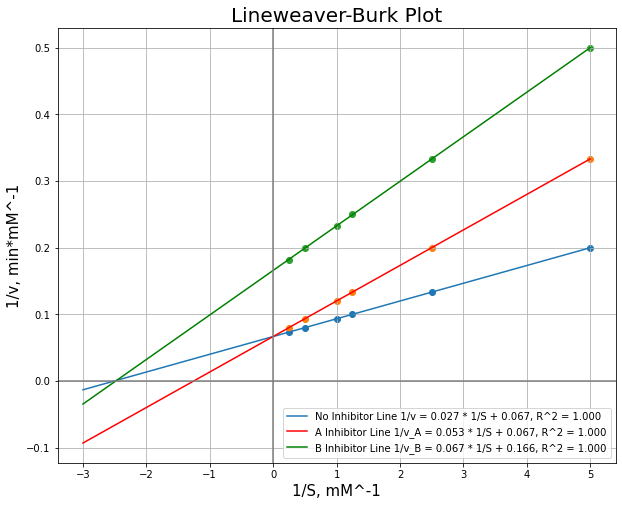

In [182]:
plt.figure(figsize=(10,8))

slope, intercept, r_value, p_value, std_err = stats.linregress(1/S,1/v)
plt.plot(x, slope*x+intercept)


slopeA, interceptA, r_valueA, p_valueA, std_errA = stats.linregress(1/S,1/v_A)
plt.plot(x, slopeA*x+interceptA, 'r')

slopeB, interceptB, r_valueB, p_valueB, std_errB = stats.linregress(1/S,1/v_B)
plt.plot(x, slopeB*x+interceptB, 'g')


plt.axvline(x = 0, color = 'gray')
plt.axhline(y = 0, color = 'gray')

plt.scatter(1/S, 1/v)
plt.scatter(1/S, 1/v_A)
plt.scatter(1/S, 1/v_B)

plt.legend([f"No Inhibitor Line 1/v = {slope:.3f} * 1/S + {intercept:.3f}, R^2 = {r_value*r_value:.3f}", f"A Inhibitor Line 1/v_A = {slopeA:.3f} * 1/S + {interceptA:.3f}, R^2 = {r_valueA*r_valueA:.3f}",  f"B Inhibitor Line 1/v_B = {slopeB:.3f} * 1/S + {interceptB:.3f}, R^2 = {r_valueB*r_valueB:.3f}"])
plt.grid()
plt.xlabel("1/S, mM^-1", fontsize = 15)
plt.ylabel("1/v, min*mM^-1", fontsize = 15)
plt.title("Lineweaver-Burk Plot", fontsize = 20)
plt.savefig(f"Lineweaver-Burk_Plot_1.eps")
#Because the y-intercept in the same for No inhibitor and inhibitor A, one understands that it a competitive inhibition (same vmax).
#Because the No inhibitor and the B inhibitor line possess the same x intercept, the inhibition is non competitive.

In [183]:
vmax=1/intercept
print(vmax)
Km=vmax*slope
print(Km)

14.978316163150291
0.3990531783355076


In [184]:
S=np.array([0.1, 0.3, 0.7, 2, 4, 6])
v_1mM=np.array([1.09, 2.89, 5.24, 8.85, 10.89, 12.11])
v_2mM=np.array([0.74, 1.96, 3.89, 7.4, 9.82, 11.36])
v_3mM=np.array([0.52, 1.47, 3.01, 6.31, 8.76, 10.02])
v_4mM=np.array([0.42, 1.17, 2.51, 5.43, 8.07, 9.37])
x=np.linspace(-1,10,600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


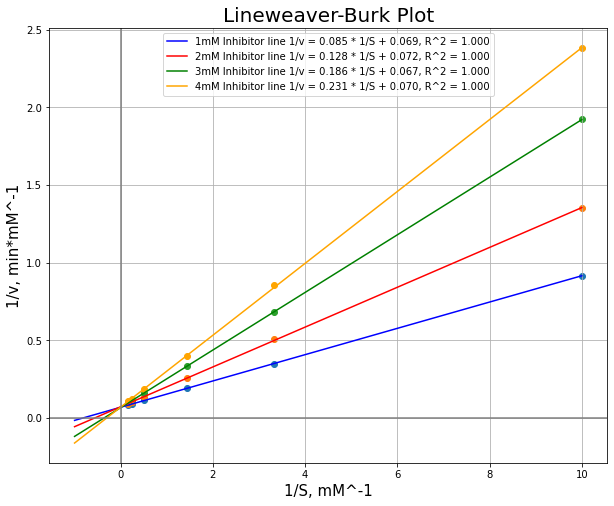

In [185]:
plt.figure(figsize=(10,8))

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(1/S,1/v_1mM)
plt.plot(x, slope1*x+intercept1, 'b')

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(1/S,1/v_2mM)
plt.plot(x, slope2*x+intercept2, 'r')

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(1/S,1/v_3mM)
plt.plot(x, slope3*x+intercept3, 'g')

slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(1/S,1/v_4mM)
plt.plot(x, slope4*x+intercept4, 'orange')


plt.axvline(x = 0, color = 'gray')
plt.axhline(y = 0, color = 'gray')

plt.scatter(1/S, 1/v_1mM)
plt.scatter(1/S, 1/v_2mM)
plt.scatter(1/S, 1/v_3mM)
plt.scatter(1/S, 1/v_4mM, color='orange')


plt.legend([f"1mM Inhibitor line 1/v = {slope1:.3f} * 1/S + {intercept1:.3f}, R^2 = {r_value1*r_value1:.3f}", f"2mM Inhibitor line 1/v = {slope2:.3f} * 1/S + {intercept2:.3f}, R^2 = {r_value2*r_value2:.3f}",  f"3mM Inhibitor line 1/v = {slope3:.3f} * 1/S + {intercept3:.3f}, R^2 = {r_value3*r_value3:.3f}", f"4mM Inhibitor line 1/v = {slope4:.3f} * 1/S + {intercept4:.3f}, R^2 = {r_value4*r_value4:.3f}"])
plt.grid()
plt.xlabel("1/S, mM^-1", fontsize = 15)
plt.ylabel("1/v, min*mM^-1", fontsize = 15)
plt.title("Lineweaver-Burk Plot", fontsize = 20)
plt.savefig(f"Lineweaver-Burk_Plot_2.eps")
#Considering that the slope of the lines vary with concentration and so does the x intercept, one understands that this is a competitive inhibition. vmax is more or less constant
vmax = np.mean([intercept1, intercept2, intercept3, intercept4])

In [186]:
slopes = np.array([slope1, slope2, slope3, slope4])
I = np.array([1, 2, 3, 4]) #mM
x1=np.linspace(-1,4.5,600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.0022958216034543034
0.6650397850459113


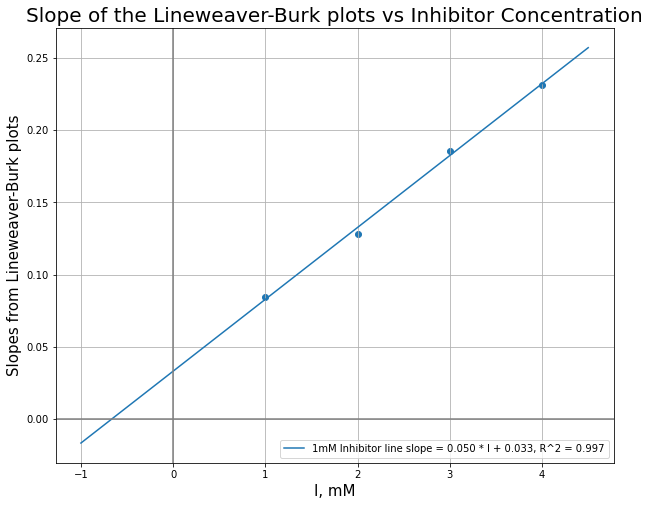

In [187]:
plt.figure(figsize=(10,8))

slopeI, interceptI, r_valueI, p_valueI, std_errI = stats.linregress(I,slopes)

plt.plot(x1, x1*slopeI + interceptI)

plt.axvline(x = 0, color = 'gray')
plt.axhline(y = 0, color = 'gray')

plt.legend([f"1mM Inhibitor line slope = {slopeI:.3f} * I + {interceptI:.3f}, R^2 = {r_valueI*r_valueI:.3f}"])
plt.scatter(I, slopes)
plt.grid()
plt.xlabel("I, mM", fontsize = 15)
plt.ylabel("Slopes from Lineweaver-Burk plots", fontsize = 15)
plt.title("Slope of the Lineweaver-Burk plots vs Inhibitor Concentration", fontsize = 20)
plt.savefig(f"slopevsI.eps")
Km=interceptI*vmax
KI=(slopeI*vmax/Km)**-1

print(Km) #slope = Km/KIvmax
print(KI) #intercept =km/vmax